In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('titanic_train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Número de passageiros por sexo

In [7]:
data.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

### Número de sobreviventes e mortos

In [8]:
data.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

### Média de idade por sexo

In [9]:
data.groupby('Sex')['Age'].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [10]:
data.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [11]:
data.Fare.sum()

28693.9493

### Passageiros por classe

Aqui conseguimos perceber que a maior dos passageiros se encontravam na 3º classe do titanic

In [12]:
data.groupby('Pclass').size()

Pclass
1    216
2    184
3    491
dtype: int64

In [13]:
data_age = data[['Age', 'Survived']]
data_age = data_age.dropna()

In [14]:
data_age.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

### Mortos e sobreviventes separados por sexo

Precebe-se que a maior quantidade de mortos se encontram no sexo masculino.
- OBS: Penso que talvez a causa disso seja que os homens tenhan se sacrificado para salvar as mulheres e crianças. Claro que a maioria dos passageiros são homens, porém quando olhamos para a porcentagem de sobrevivencia precebemos que mesmo havendo menos mulhers a homens no titanic, sobreviveram mais pessoas do sexo feminino que do sexo masculino.

In [17]:
data.groupby(['Survived', 'Sex']).size()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

In [18]:
data.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

Olhando a porcetagem de sobrevivencia de cada sexo pecebemos que as chance maiores de sobrevivencia do titanic era do sexo feminino com 74% de chance de sobreviver. Disparado em relação aos homens que possuiam apenas 18% de chance.

In [20]:
homem = ((109 * 100) / 577)
mulher = ((233 * 100) / 314)

print(f'Mulher: {mulher}%')
print(f'Homem: {homem}%')

Mulher: 74.20382165605096%
Homem: 18.890814558058924%


In [29]:
men_suv = data[(data['Survived'] == 1) & (data['Sex'] == 'male')]
men_dead = data[(data['Survived'] == 0) & (data['Sex']  == 'male')]
men_suv

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
...,...,...,...,...,...,...,...,...,...,...,...,...
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


In [27]:
men_suv.groupby('Pclass').size()

Pclass
1    45
2    17
3    47
dtype: int64

In [30]:
men_dead.groupby('Pclass').size()

Pclass
1     77
2     91
3    300
dtype: int64

In [31]:
won_suv = data[(data['Survived'] == 1) & (data['Sex'] == 'female')]
won_dead = data[(data['Survived'] == 0) & (data['Sex']  == 'female')]
won_suv

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [32]:
won_suv.groupby('Pclass').size()

Pclass
1    91
2    70
3    72
dtype: int64

In [33]:
won_dead.groupby('Pclass').size()

Pclass
1     3
2     6
3    72
dtype: int64

In [34]:
data.groupby(['Pclass', 'Sex']).size()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

### Observando porcetangem de morte na 3º class

Observamos que na 3º classe a o número de mortes em relação a 1º e 2º class é muito maior, e por mais incrível que pareça também morreram mais homens a mulheres nesta classe.

In [36]:
men_suv_3 = ((300 * 100) / 347)
won_suv_3 = ((72 * 100) / 144)

print(f'Homem morrer na 3º class: {men_suv_3}%')
print(f'Mulher morrer na 3º classe: {won_suv_3}%')

Homem morrer na 3º class: 86.45533141210375%
Mulher morrer na 3º classe: 50.0%


### Para Observação de sobreviventes e mortos do titanic

Podemos ver com mais facilidade neste gráfico que o número de sobrevivencia de mulheres foi maior que o número de mortes, e de forma inversa vemos que o número de sobrevivência dos homens foi menor que o número de mortes do mesmo.

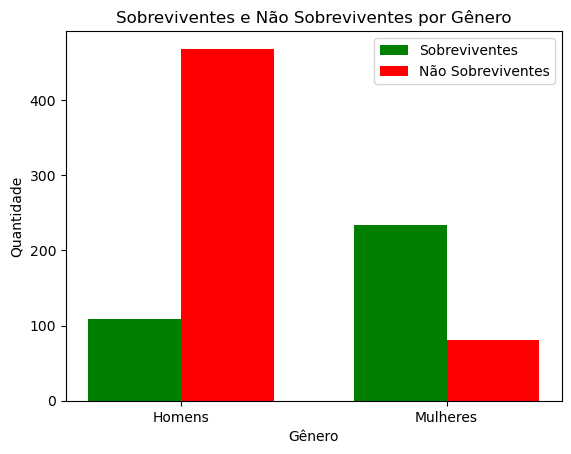

In [49]:
# Contar o número de sobreviventes e não-sobreviventes por gênero
sobreviventes = data[data['Survived'] == 1]['Sex'].value_counts()
nao_sobreviventes = data[data['Survived'] == 0]['Sex'].value_counts()

# Configuração do gráfico
largura_barra = 0.35
generos = ['male', 'female']
posicao = range(len(generos))

# Criar gráfico de barras agrupado
plt.bar([p - largura_barra/2 for p in posicao], sobreviventes[generos], largura_barra, label='Sobreviventes', color='green')
plt.bar([p + largura_barra/2 for p in posicao], nao_sobreviventes[generos], largura_barra, label='Não Sobreviventes', color='red')

# Títulos e rótulos
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.title('Sobreviventes e Não Sobreviventes por Gênero')
plt.xticks(posicao, ['Homens', 'Mulheres'])
plt.legend()

# Exibir o gráfico
plt.show()